   INCOME  SPEND
0     233    150
1     250    187
2     204    172
3     236    178
4     354    163
(303, 2)
           INCOME       SPEND
count  303.000000  303.000000
mean   245.273927  149.646865
std     48.499412   22.905161
min    126.000000   71.000000
25%    211.000000  133.500000
50%    240.000000  153.000000
75%    274.000000  166.000000
max    417.000000  202.000000
INCOME    0
SPEND     0
dtype: int64
[[233 150]
 [250 187]
 [204 172]
 [236 178]
 [354 163]
 [192 148]
 [294 153]
 [263 173]
 [199 162]
 [168 174]
 [239 160]
 [275 139]
 [266 171]
 [211 144]
 [283 162]
 [219 158]
 [340 172]
 [226 114]
 [247 171]
 [239 151]
 [234 161]
 [233 179]
 [226 178]
 [243 137]
 [199 178]
 [302 162]
 [212 157]
 [175 123]
 [417 157]
 [197 152]
 [198 168]
 [177 140]
 [219 188]
 [273 152]
 [213 125]
 [177 160]
 [304 170]
 [232 165]
 [269 148]
 [360 151]
 [308 142]
 [245 180]
 [208 148]
 [264 143]
 [321 182]
 [325 172]
 [235 180]
 [257 156]
 [216 115]
 [234 160]
 [256 149]
 [302 151]
 [231 146]

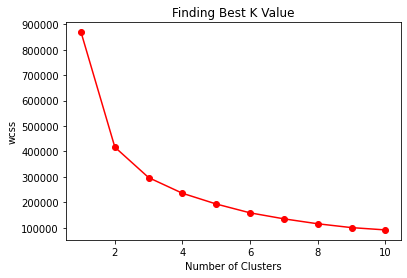

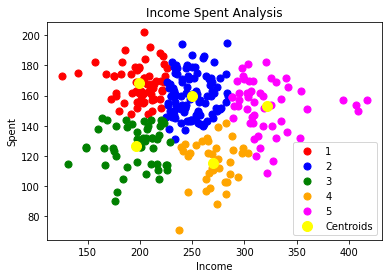

' Using Visualizing \n\nCluster 1: Customers with medium income and low spend\n\nCluster 2: Customers with high income and medium to high spend\n\nCluster 3: Customers with low income\n\nCluster 4: Customers with medium income but high spend\n'

In [3]:
import pandas as pd

data = pd.read_csv("/content/dataset.csv")

print(data.head())
print(data.shape)
print(data.describe())
print(data.isnull().sum())

Income = data["INCOME"].values
Spend = data["SPEND"].values

import numpy as np
X = np.array(list(zip(Income,Spend)))
print(X)

from sklearn.cluster import KMeans
wcss =[]

for i in range(1,11):
    KM = KMeans(n_clusters=i, random_state=0)
    KM.fit(X)
    wcss.append(KM.inertia_)
    print(i)
    print(wcss)

import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss, color="RED", marker = "o" )
plt.title("Finding Best K Value")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

# k = 4 /5 Found Using Elbow Method

Model = KMeans(n_clusters = 5, random_state = 0)
y_means = Model.fit_predict(X)

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='red',  label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue', label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='orange', label='4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta', label='5')


plt.scatter(Model.cluster_centers_[:,0], Model.cluster_centers_[:,1], s=100, marker='o', c='yellow', label='Centroids')

plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()


""" Using Visualizing 

Cluster 1: Customers with medium income and low spend

Cluster 2: Customers with high income and medium to high spend

Cluster 3: Customers with low income

Cluster 4: Customers with medium income but high spend
"""


